<a href="https://colab.research.google.com/github/LucasDenv/meus_projetos/blob/main/Analise%20de%20uma%20planilha(Top_Filmes_Amazon_e_Netflix).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>origem do dataset: </p><a>https://www.kaggle.com/datasets/jyotmakadiya/popular-movies-and-tv-shows-amazon-prime-netflix/</a>
<p>Link Drive Dataset </p><a>https://drive.google.com/drive/folders/1Dr9qQxWroCRIIMWUcCO6GX3AJlMC3RVq?usp=sharing</a>

<h1>Análise de Big Data</h1>
<br>
<br>
<h2>Dataset Top Filmes Amazon e Netflix<h2>


In [ ]:
import pandas as pd
df = pd.read_csv("FilmesPopulares.csv")
display (df)

,Unnamed: 0,ID,Title,Year,Rating,IMDb,Rotten Tomatoes,Genre,Netflix,Amazon Prime Video
0,0,1.0,Terminator: Dark Fate,2019.0,18+,6.2,81,Action & Adventure,0.0,1.0
1,1,2.0,Gemini Man,2019.0,13+,5.7,74,Action & Adventure,0.0,1.0
2,2,3.0,Rambo: Last Blood,2019.0,18+,6.1,72,Action & Adventure,0.0,1.0
3,3,4.0,The Courier,2019.0,18+,4.9,50,Action & Adventure,0.0,1.0
4,4,5.0,Crawl,2019.0,18+,6.1,79,Action & Adventure,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2994,2994,2995.0,The Fast and the Fierce,2017.0,NaN,2.4,32,Crime,0.0,1.0
2995,2995,2996.0,Groupie,2010.0,NaN,3.4,24,Crime,0.0,1.0
2996,2996,2997.0,Hayride,2012.0,NaN,3.4,29,Crime,0.0,1.0
2997,2997,2998.0,Jack's Back,1988.0,18+,5.9,58,Crime,0.0,1.0


In [ ]:
media_avaliaçao = df["IMDb"].sum()/2998
print("{:.2f}".format(media_avaliaçao))

5.70


In [ ]:
df["Rotten Tomatoes"] = pd.to_numeric(df["Rotten Tomatoes"], errors='coerce') # Serve para quando convertermos os valores da tabela, os que não poderem ser convertidos para o type int em valores "NaN" (Not-a-Number)
media_aval_criticos = df["Rotten Tomatoes"].mean()
print("{:.2f}".format(media_aval_criticos))

47.82


Pegamos a média IMDb e a média Tomatoes para filtrar os filmes que estão acima de ambas as avaliações

In [ ]:
# Criar um DataFrame filtrando os filmes com classificações acima de 5 em IMDb e Rotten Tomatoes
filtro = (df["IMDb"] >= 5.70) & (df["Rotten Tomatoes"] >= 47.82)
filmes_filtrados = df[filtro]

# Ordenar a tabela por gênero em ordem alfabética usamos sort_values
tabela_filmes_estilos = filmes_filtrados.sort_values(by=["Genre"])

# Em seguida, ordenamos por Rotten Tomatoes em ordem decrescente utilizando parâmetro ascending no método sort_values para especificar dentro de cada grupo de gênero  a ordem de ordenação das colunas
tabela_filmes_estilos = filmes_filtrados.sort_values(by=["Genre", "Rotten Tomatoes"], ascending=[True, False])

# para resetar o índice do Pandas(Questão visual)
tabela_filmes_estilos.reset_index(drop=True, inplace=True)

display(tabela_filmes_estilos)


,Unnamed: 0,ID,Title,Year,Rating,IMDb,Rotten Tomatoes,Genre,Netflix,Amazon Prime Video
0,8,9.0,The Avengers,2012.0,13+,8.0,94.0,Action & Adventure,0.0,1.0
1,603,604.0,Casino Royale,2006.0,13+,8.0,93.0,Action & Adventure,0.0,1.0
2,2828,2829.0,Once Upon a Time in the West,1968.0,13+,8.5,93.0,Action & Adventure,0.0,1.0
3,1178,1179.0,The Bourne Ultimatum,2007.0,13+,8.0,92.0,Action & Adventure,0.0,1.0
4,17,18.0,Train to Busan,2016.0,NaN,7.6,90.0,Action & Adventure,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1099,2256,2257.0,Death Walks on High Heels,1971.0,NaN,6.6,50.0,Thriller,0.0,1.0
1100,2784,2785.0,Gentleman,1993.0,NaN,7.9,49.0,Thriller,0.0,1.0
1101,580,581.0,Misbehavior,2016.0,NaN,5.8,48.0,Thriller,0.0,1.0
1102,1692,1693.0,The Capture,2017.0,NaN,6.1,48.0,Thriller,0.0,1.0


Em seguida criamos uma tabela só como genero e a nota Rotten Tomatoes

In [ ]:

media_notas_rotten_por_genero = tabela_filmes_estilos.groupby("Genre")["Rotten Tomatoes"].mean().reset_index()

# Utilizamos a função round() com o parâmetro 2 para deixa com duas casas decimais a media
media_notas_rotten_por_genero["Rotten Tomatoes"] = media_notas_rotten_por_genero["Rotten Tomatoes"].round(2)

media_notas_rotten_por_genero = media_notas_rotten_por_genero.sort_values(by="Rotten Tomatoes", ascending=False)

# para resetar o índice do Pandas(Questão visual)
media_notas_rotten_por_genero.reset_index(drop=True, inplace=True)

print("Média de notas Rotten Tomatoes por gênero (ordenado decrescentemente):")
display(media_notas_rotten_por_genero)

Média de notas Rotten Tomatoes por gênero (ordenado decrescentemente):


,Genre,Rotten Tomatoes
0,Action & Adventure,71.78
1,Drama,67.37
2,Comedy,66.46
3,Crime,62.30
4,Biography,60.23
5,Documentary,58.41
6,Animation,58.00
7,Horror,56.92
8,Thriller,56.36
9,Romance,56.28


Em seguida criamos uma tabela só como genero e a nota IMDb

In [ ]:
media_avaliacoes_por_genero = tabela_filmes_estilos.groupby("Genre")["IMDb"].mean().reset_index()
# Utilizamos a função round() com o parâmetro 2 para deixa com duas casas decimais a media
media_avaliacoes_por_genero["IMDb"] = media_avaliacoes_por_genero["IMDb"].round(2)

media_avaliacoes_por_genero = media_avaliacoes_por_genero.sort_values(by="IMDb", ascending=False)

# para resetar o índice do Pandas(Questão visual)
media_avaliacoes_por_genero.reset_index(drop=True, inplace=True)

print("Média de avaliações IMDb por gênero:")
display(media_avaliacoes_por_genero)

Média de avaliações IMDb por gênero:


,Genre,IMDb
0,Fantasy,7.50
1,Documentary,7.23
2,Family,7.20
3,Biography,7.16
4,Animation,6.91
5,Romance,6.91
6,Crime,6.72
7,Thriller,6.71
8,Drama,6.70
9,Action & Adventure,6.65


Notamos uma variação considerável nas avaliações do IMDb e do Rotten Tomatoes entre diferentes gêneros de filmes. Isso dificultou a comparação direta entre os gêneros e a identificação dos gêneros com melhor desempenho em cada métrica.
Para tornar as análise mais informativa e permitir uma comparação mais precisa entre os gêneros, decidimos normalizar as avaliações do IMDb e do Rotten Tomatoes em uma escala de 0 a 10 (convertendo as avaliações do Rotten Tomatoes em uma escala compatível).

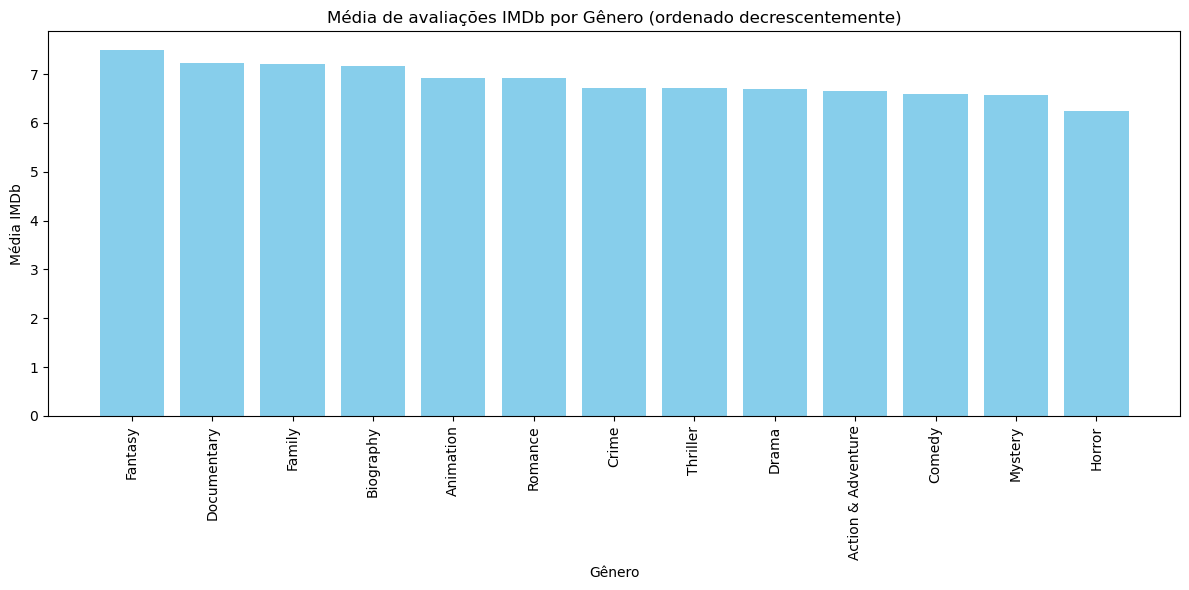

In [ ]:
import matplotlib.pyplot as plt

 #Criamos o grafico de barras pela extensão matplotlib
plt.figure(figsize=(12, 6)) #Aqui dimensionamos o grafico
plt.bar(media_avaliacoes_por_genero['Genre'], media_avaliacoes_por_genero['IMDb'], color='skyblue') #(X,Y,Cor)
plt.xlabel('Gênero')
plt.ylabel('Média IMDb')
plt.title('Média de avaliações IMDb por Gênero (ordenado decrescentemente)')
plt.xticks(rotation=90)  #Rotação dos rótulos no eixo x para melhor visualização

plt.tight_layout() #Serve para deixar o desing mais agradável
plt.show()


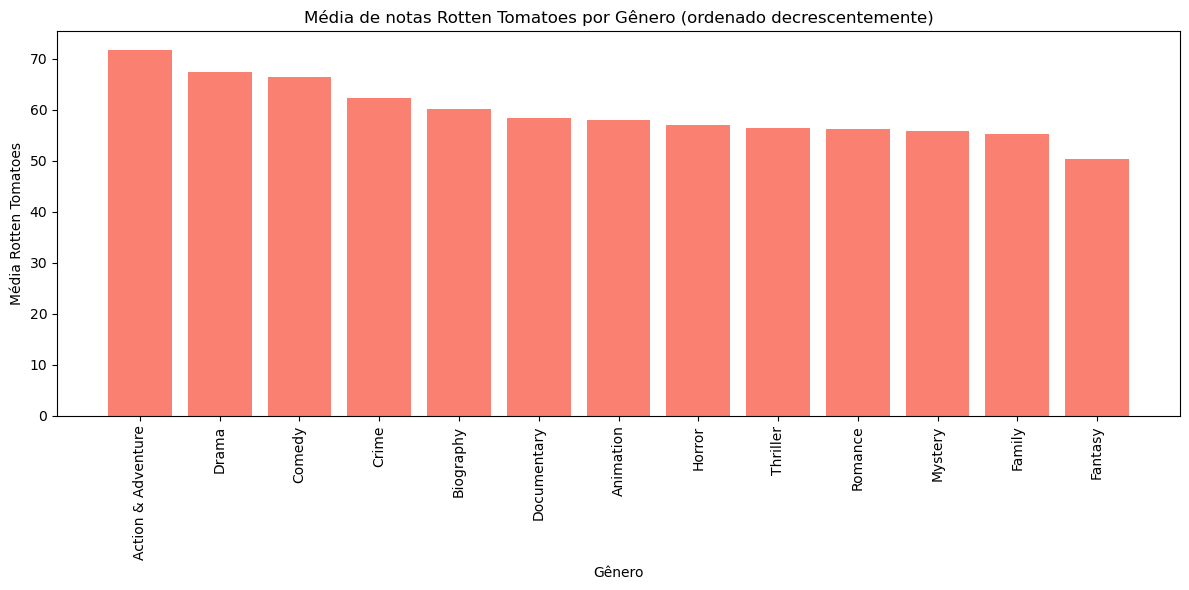

In [ ]:
import matplotlib.pyplot as plt

# Criamos o grafico de barras pela extensão matplotlib
plt.figure(figsize=(12, 6)) #Aqui dimensionamos o grafico
plt.bar(media_notas_rotten_por_genero['Genre'], media_notas_rotten_por_genero['Rotten Tomatoes'], color='salmon') #(X,Y,Cor)
plt.xlabel('Gênero')
plt.ylabel('Média Rotten Tomatoes')
plt.title('Média de notas Rotten Tomatoes por Gênero (ordenado decrescentemente)')
plt.xticks(rotation=90) #Rotação dos rótulos no eixo x para melhor visualização

plt.tight_layout() #Serve para deixar o desing mais agradável
plt.show()

<h3> Dividindo as notas de Rotten tomatoes por 10 ficaremos com essas notas paralelas as da IMDb </h3>

In [ ]:
media_notas_rotten_por_genero["Rotten Tomatoes"] = media_notas_rotten_por_genero["Rotten Tomatoes"] / 10
# Utilizamos a função round() com o parâmetro 2 para deixa com duas casas decimais a media
media_notas_rotten_por_genero["Rotten Tomatoes"] = media_notas_rotten_por_genero["Rotten Tomatoes"].round(2)

print("Média de notas Rotten Tomatoes por gênero (ordenado decrescentemente):")
display(media_notas_rotten_por_genero)

Média de notas Rotten Tomatoes por gênero (ordenado decrescentemente):


,Genre,Rotten Tomatoes
0,Action & Adventure,7.18
1,Drama,6.74
2,Comedy,6.65
3,Crime,6.23
4,Biography,6.02
5,Documentary,5.84
6,Animation,5.80
7,Horror,5.69
8,Thriller,5.64
9,Romance,5.63


Para Simular uma melhor comparação entre as avaliaçõe decidimos criar uma coluna chamada Nota Geral que contém a media das notas de IMDb e Rotten Tomatoes

In [ ]:
# Junte as duas tabelas usando a coluna "Genre" como chave
tabela_completa = pd.merge(media_avaliacoes_por_genero, media_notas_rotten_por_genero, on="Genre")

# Calcule a média das notas (IMDb e Rotten Tomatoes) para cada gênero
tabela_completa["Nota Geral"] = (tabela_completa["IMDb"] + tabela_completa["Rotten Tomatoes"]) / 2

# Arredonde os valores da coluna "Notas Gerais" para duas casas decimais
tabela_completa["Nota Geral"] = tabela_completa["Nota Geral"].round(2)

# Ordenar a tabela em ordem decrescente em relação à coluna "Notas Gerais"
tabela_completa = tabela_completa.sort_values(by="Nota Geral", ascending=False)

tabela_completa = tabela_completa.reset_index(drop=True)
# Exiba a tabela resultante
print("Tabela de Notas Gerais por Gênero:")
display(tabela_completa)



Tabela de Notas Gerais por Gênero:


,Genre,IMDb,Rotten Tomatoes,Nota Geral
0,Action & Adventure,6.65,7.18,6.92
1,Drama,6.70,6.74,6.72
2,Comedy,6.59,6.65,6.62
3,Biography,7.16,6.02,6.59
4,Documentary,7.23,5.84,6.54
5,Crime,6.72,6.23,6.48
6,Family,7.20,5.53,6.36
7,Animation,6.91,5.80,6.36
8,Fantasy,7.50,5.04,6.27
9,Romance,6.91,5.63,6.27


Problema : Uma característica discrepante na tabela é que os valores das notas IMDb e Rotten Tomatoes para o gênero "Fantasy" estão muito distantes em termos de classificação. O IMDb tem uma alta pontuação de 7.50, enquanto o Rotten Tomatoes tem uma pontuação muito mais baixa de 5.04. Isso sugere uma grande discrepância nas classificações entre essas duas fontes.

Solução : Para lidar com essa discrepância, uma melhoria seria considerar uma fonte de classificação mais confiável ou tentar encontrar uma média ponderada que leve em consideração ambas as fontes, atribuindo pesos diferentes a cada uma delas com base em sua confiabilidade percebida. Além disso, pode ser útil investigar por que há uma diferença tão grande entre essas duas fontes para o gênero "Fantasy" e, se possível, corrigir ou atualizar as classificações para torná-las mais consistentes.